In [12]:
### Exploratory data Analysis 
# Initial Cleaning

In [13]:
import pandas as pd

path = "E:\\Programacao\\LAPES\\EDA_ML_DL_PS\\LAPES-Data-Challenge-Predictive-Analytics-System\\data\\bronze\\creditcard.csv" 
df = pd.read_csv(path)
df.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [30]:
# Checking for nulls
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# checking for duplicate entries
df.duplicated().sum()

np.int64(1081)

In [ ]:
# Let's see these duplicates
df[df.duplicated()].describe()

ValueError: Cannot describe a DataFrame without columns

In [29]:
# Cleaning the dataset
print(f'df shape before removing duplicates: {df.shape}')
print('removing duplicates...')
df_cleaned = df.drop_duplicates()
print(f'removed rows: {df_cleaned.shape[0]-df_cleaned.shape[0]} ; shape after removal: {df_cleaned.shape}')

df shape before removing duplicates: (284807, 31)
removing duplicates...
removed rows: 0 ; shape after removal: (283726, 31)


In [ ]:
# checking info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [18]:
# lets analyze the class column by first checking the imbalance in the Class column
df_cleaned.value_counts("Class")

Class
0    283253
1       473
Name: count, dtype: int64

mkdir -p failed for path C:\Users\Jos� Victor\.matplotlib: [WinError 5] Acesso negado: 'C:\\Users\\Jos� Victor'
Matplotlib created a temporary cache directory at C:\Users\JOSVIC~1\AppData\Local\Temp\matplotlib-lkqt_87l because there was an issue with the default path (C:\Users\Jos� Victor\.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<Axes: ylabel='count'>

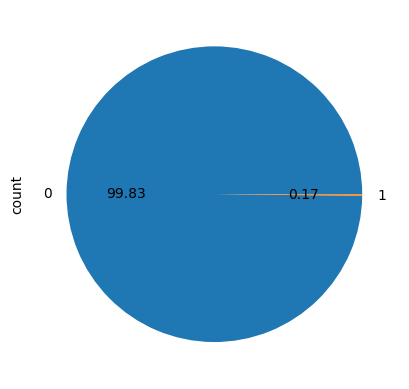

In [19]:
#plotting to see the fraud class imbalance in a piechart
fraud_class = df_cleaned.Class
fraud_class.value_counts().plot.pie(autopct="%.2f")

<Axes: xlabel='Class'>

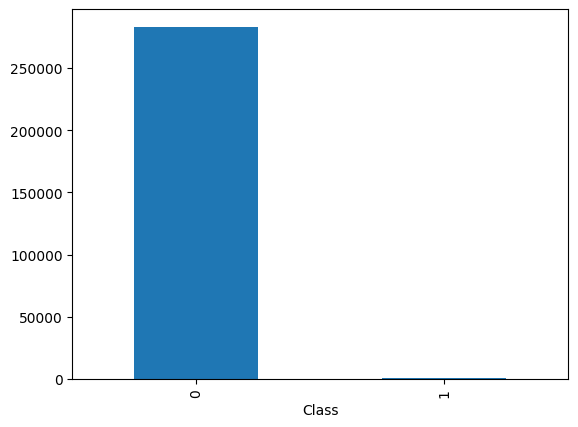

In [20]:
#plotting to see the fraud class imbalance in a barplot
fraud_class.value_counts().plot.bar()

In [21]:
# noting the percentile proportion
fraud_class.value_counts() / fraud_class.shape[0] * 100

Class
0    99.83329
1     0.16671
Name: count, dtype: float64

In [22]:
# continuing initial analysis
df_cleaned.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


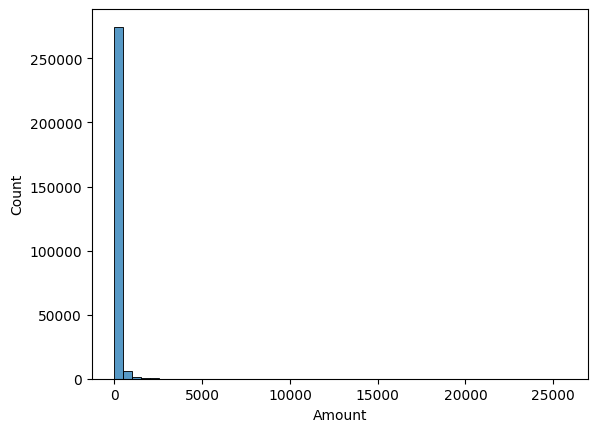

In [23]:
# max time in seconds: 172792/3600 = 47.997 hours. Coresponds with the two days worth of transaction data
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_cleaned, x='Amount', binwidth=500)
plt.show()

### Feature Engineering for Exploration: Creating `Amount_log`

During the exploratory data analysis (EDA), we observed that the `Amount` feature shows a **strong positive skew**, with most transactions being low-value and a small number of very high-value outliers.

To better visualize and analyze this distribution, we applied a **logarithmic transformation**, creating a new column called `Amount_log`. This transformation helps:

- Reduce the impact of extreme outliers
- Make the distribution more normal-like
- Allow for clearer visualization in boxplots and other graphs
- Provide better interpretability for class comparisons (fraud vs non-fraud)

---

**Important Note:**  
This feature (`Amount_log`) was created **only for EDA and visualization purposes**.  
It will **not be included in the Silver data layer**, in accordance with good data lake practices.

> All formal feature engineering steps (including this log transformation, if we choose to use it for modeling after later testing) **will be implemented inside the ML pipeline (`/src/ml_pipeline.py`)** when building our modeling dataset (Gold layer).



C:\Users\José Victor\AppData\Local\Temp\ipykernel_22540\459494603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Amount_log'] = np.log(df_cleaned['Amount'] + 1)


<Axes: xlabel='Amount_log', ylabel='Class'>

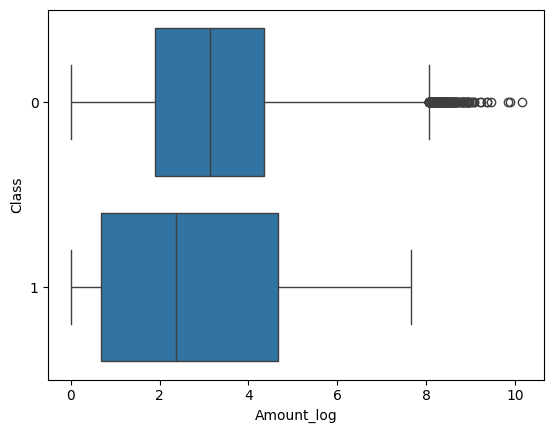

In [24]:
# Amount varies a lot, lets look more into that and see if any of the outliers are frauds
# df.loc[:,"Amount":"Class"].sort_values(by='Amount', ascending=False)
# There are a couple of outliers, namely this 25000
# However the first fraud only shows up at Amount 2125.87, so this high variance shouldnt affect the model later
import numpy as np


# log-scaling in order to properly see the data that would be obscured by the outliers
df_cleaned['Amount_log'] = np.log(df_cleaned['Amount'] + 1)
sns.boxplot(data = df_cleaned, x='Amount_log',y='Class', orient='h')

As expected, since there is a lot less data about the fraud transactions, it is more spread out
Noticibly it's values are generally lower, indicating most fraud transactions tend to have smaller, more common amounts. Although we can see the maximums and minimums roughly align with regular transactions.

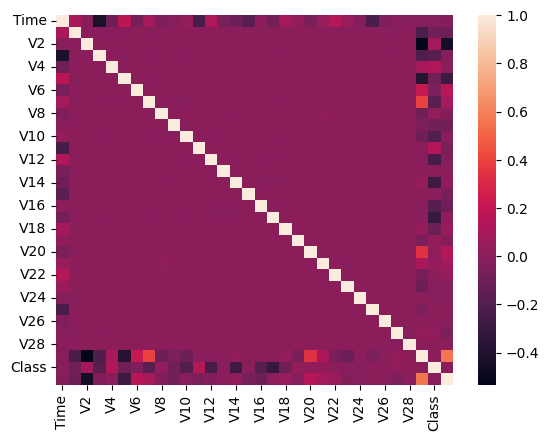

In [25]:
#correlation between features -> very usefull later in machine learning process for feature engineering and dropping

corr = df_cleaned.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
# Too many features! lets see the correlation only with our target Class, for better understanding
Top_corr = df_cleaned.corr()['Class'].drop('Class').abs().sort_values(ascending=False)
print(Top_corr)


V17           0.313498
V14           0.293375
V12           0.250711
V10           0.206971
V16           0.187186
V3            0.182322
V7            0.172347
V11           0.149067
V4            0.129326
V18           0.105340
V1            0.094486
V9            0.094021
V5            0.087812
V2            0.084624
V6            0.043915
V19           0.033631
V8            0.033068
V21           0.026357
V27           0.021892
V20           0.021486
Time          0.012359
V28           0.009682
Amount_log    0.007798
V24           0.007210
V23           0.006333
Amount        0.005777
V22           0.004887
V26           0.004265
V13           0.003897
V15           0.003300
V25           0.003202
Name: Class, dtype: float64


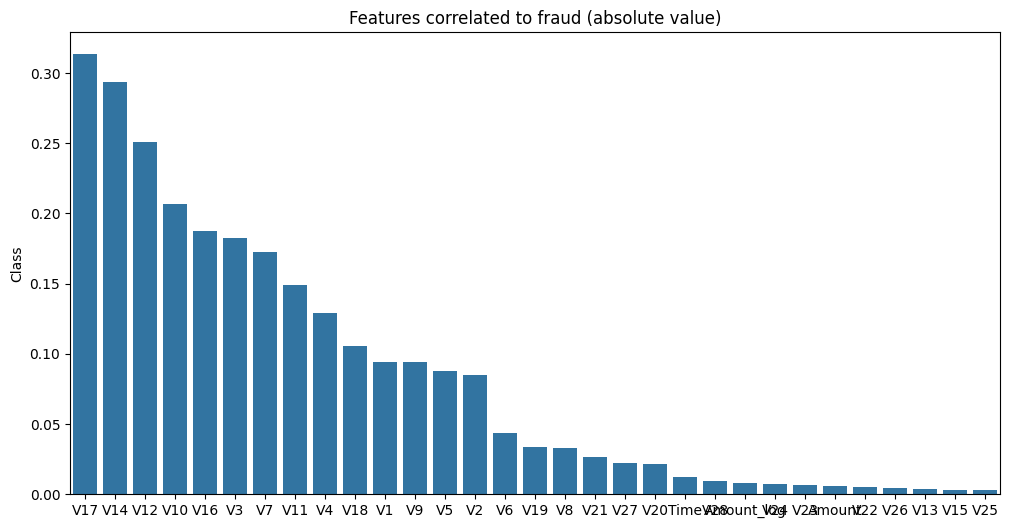

In [27]:
# given the one-dimensionality of the correlation, here is a barplot showing the most and least absolutely correlated
# features 

plt.figure(figsize=(12,6))
sns.barplot(Top_corr)
plt.title("Features correlated to fraud (absolute value)")
plt.show()

WIP: here there should be a markdown talking about the graph, btw all the graphs need title and captions so those should be added

In [28]:
# What changes between non-fraudulent and fraudulent
df_cleaned.groupby('Class').median() # median used beacause it reflects better the log-transformed Amount

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_log
Class,,,,,,,,,,,,,,,,,,,,,
0,84711.0,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.00,3.135494
1,73408.0,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.82,2.381396


### File Format Decisions Across Data Layers

Given that the original dataset from Kaggle was provided in CSV format, we chose to **keep the raw CSV file in the Bronze layer**, in line with data lake best practices of preserving source data in its native, raw format.

Starting from the Silver layer onward, we converted the data to **Parquet format**, which offers:

- Better compression
- Faster read/write speeds
- More efficient downstream processing for ML and dashboard tasks

This design choice aligns with the Medallion Architecture principle of using **Bronze for raw input preservation** and **Parquet for optimized internal layers**.
